# Aprendizado Supervisionado e K Vizinhos mais Próximos

## Introdução

Nós utilizaremos a base de dados de taxa de rejeição da indústria de telecomunicações para essa lista de exercícios. A base de dados tem o nome `Orange_Telecom_Churn_Data.csv`. Nesse notebook carregaremos a base de dados, faremos algum pré-processamento e usaremos a técnica k-NN para predizer a taxa de rejeição baseado nas características mensuradas.

## Exercício 1

* Comece importando os dados através do pandas. Examine as colunas e os dados
* Note que os dados contêm estado, código de área e telefone. Você acha que esses atributos são interessantes para construir nosso modelo de classificação? Por que?

Não utilizaremos esses atributos para essa base, então eles podem ser removidos do dataframe (método `drop`).

In [78]:
import pandas as pd
import numpy as np

arquivo = 'data/Orange_Telecom_Churn_Data.csv'

# Importando o arquivo
data = pd.read_csv(arquivo)
#print(data)

# Não, pois a localização do cliente muitas vezes não está relacionada ao perfil de utilização do serviço fornecido, 
# nesse exemplo os valores são muito proximos e isso acarretaria em uma classificação equivocada e de forma errada muitas vezes.
# Construir um modelo usando o número de telefone pode acarretar erros tbm, pois muitas vezes os dados são de clientes antigos,
# o que também gera uma classificação equivocada, seria como classificar usando o nome dos clientes, seria algo muito especifico

data = data.drop(columns=['state','area_code','phone_number'])
print(data.columns)

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')


## Exercício 2

* Note que algumas das colunas são categóricas e algumas são *float*. Esses atributos precisam ser numéricos para usar os algoritmos que aprenderemos no curso.
* Finalmente, o algoritmo K-Vizinhos mais próximos necessita de dados escalonados. Escalone os dados utilizando um dos métodos aprendidos em aula.

In [80]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer

#print(data.intl_plan) #yes/no
#print(data.voice_mail_plan) #yes/no
#print(data.churned) #True/False
bin_cols = ['intl_plan', 'voice_mail_plan', 'churned']

for column in bin_cols:
    data[column] = lb.fit_transform(data[column])

data[data.columns] = scaler.fit_transform(data)
print(data)


      account_length  intl_plan  voice_mail_plan  number_vmail_messages  \
0           0.524793        0.0              1.0               0.480769   
1           0.438017        0.0              1.0               0.500000   
2           0.561983        0.0              0.0               0.000000   
3           0.342975        1.0              0.0               0.000000   
4           0.305785        1.0              0.0               0.000000   
5           0.483471        1.0              0.0               0.000000   
6           0.495868        0.0              1.0               0.461538   
7           0.603306        1.0              0.0               0.000000   
8           0.479339        0.0              0.0               0.000000   
9           0.578512        1.0              1.0               0.711538   
10          0.264463        0.0              0.0               0.000000   
11          0.301653        0.0              0.0               0.000000   
12          0.690083     

## Exercício 3

* Separe as colunas de atributos (todas menos `churned`) da  coluna de rótulo (`churned`). Isso criará duas tabelas.
* Aplique o método `.fit()` do K-nearest neighbors com um valor de `n_neighbors=3` para essa base de dados e verifique o resultado com o método `.predict()` na mesma base.

In [83]:
from sklearn.neighbors import KNeighborsClassifier

x_cols = [x for x in data.columns if x != 'churned']

X_data = data[x_cols]
y_data = data['churned']

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_data, y_data)

print(knn.predict(X_data))

[0. 0. 0. ... 0. 0. 0.]


## Exercício 4

Ainda não ensinamos formas de medir o erro, mas a acurácia é um conceito simples de entender--é a porcentagem de rótulos que foram corretamente classificados:

$acc = \frac{corretos}{total}$

* Escreva uma função para calcular a acurácia usando os rótulos verdadeiros e os preditos.
* Usando a função, calcule a acurácia do K-nn nos dados.

In [89]:
def accuracy(real, predict):
    acertos = 0
    total = real.shape[0]
    for i in range(0,total):
        if(real[i]==predict[i]):
            acertos+=1
    return acertos/total

accuracy(y_data, knn.predict(X_data))

0.9422

## Exercício 5

* Repita a aplicação do modelo K-nearest neighbors mas com o parâmetro `weights=distance`. Calcule a acurácia da função criada por você.
* Repita a aplicação do modelo com `n_neighbors=3`, `weights=uniform` e `p=1` para utilizar a distância de Manhattan. Verifique os resultados.

Quando as distâncias ponderadas são utilizadas para a parte 1 dessa questão, vocês obterão acurácia de 1.0. Por que isso ocorre? *Dica:* o KNN usa diretamente os dados para fazer a predição.

In [101]:
knnA = KNeighborsClassifier(n_neighbors = 3, weights='distance')
knnA.fit(X_data, y_data)

print(accuracy(y_data, knn1.predict(X_data)))

knnB = KNeighborsClassifier(n_neighbors = 3, weights='uniform', p=1)
knnB.fit(X_data, y_data)

print(accuracy(y_data, knnB.predict(X_data)))

1.0
0.9456


## Exercício 6

* Teste o modelo KNN utilizando valores de `n_neighbors` na faixa de 1 a 20. Deixe o restante dos parâmetros como o padrão. Armazene os valores de vizinhos e acurácia em uma lista no formato [(k, acuracia)].
* Plote um gráfico do tipo *scatter* da acurácia vs vizinhos. O que acontece com `n_neighbors=1`? Por que isso ocorre?

In [110]:
score_list = list()

'''escreva no bloco abaixo'''

for k in range(1,21):
    knn.n_neighbors=k
    score_list.append((k,accuracy(y_data,knn.predict(X_data))))

'''fim do código'''

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])
score_df

,k,accuracy
0,1,1.0000
1,2,0.9292
2,3,0.9422
3,4,0.9154
4,5,0.9284
5,6,0.9156
6,7,0.9254
7,8,0.9122
8,9,0.9224
9,10,0.9092


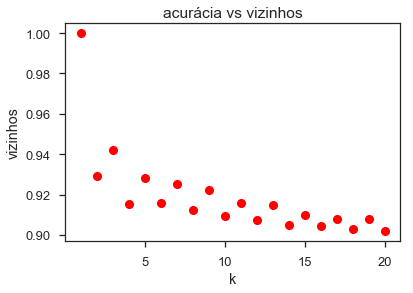

In [128]:
# Import libraries to make the plot

import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(score_df.k,score_df.accuracy, 'ro')
plt.title("acurácia vs vizinhos")
plt.xlabel("k")
plt.ylabel("vizinhos")
plt.show()

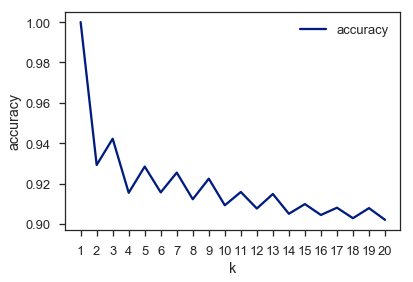

In [127]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));

#A acuracia fica igual a 1 pois fazemos o modelo usando o mesmo conjunto de dados que utilizamos para fazer os testes.